$$
\left\{
\begin{aligned}

y'' + p(x)y' + q(x)y &= f(x)\\
y(1) = \beta, 0 \le x \le 1\\
ay(0) - y'(0) = \alpha

\end{aligned}
\right.\\
$$
Здесь
$$
p(x) = -\frac{2x}{x^2 + 1}\\
q(x) = \frac{2}{x^2 + 1}\\
f(x) = 0\\
\beta = 1\\
a = 1,\ \alpha = 2
$$

Решить методом стрельбы (за минимальное число выстрелов) и методом конечых разностей.
При этом слева (x = 0) использовать фиктивную точку. При решении возникающей задачи Коши применить метод Рунге-Кутта 4 порядка.

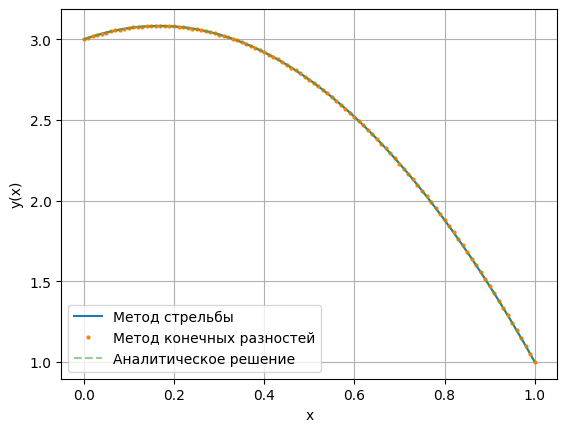

y(0) метод стрельбы: 3.0000
y(0) метод конечных разностей: 3.0000
y(0) аналитическое: 3.0000


In [2]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# Аналитическое решение
def y_analytic(x):
    return -3*x**2 + x + 3

# Параметры уравнения
def p(x):
    return -2 * x / (x**2 + 1)

def q(x):
    return 2 / (x**2 + 1)

def f(x):
    return 0

# Метод Рунге-Кутта 4-го порядка (исправленные знаки!)
def runge_kutta_4(func, x0, y0, z0, h, steps):
    x = np.zeros(steps + 1)
    y = np.zeros(steps + 1)
    z = np.zeros(steps + 1)
    x[0], y[0], z[0] = x0, y0, z0
    
    for i in range(steps):
        k1_y = h * z[i]
        k1_z = h * func(x[i], y[i], z[i])
        
        k2_y = h * (z[i] + 0.5 * k1_z)
        k2_z = h * func(x[i] + 0.5*h, y[i] + 0.5*k1_y, z[i] + 0.5*k1_z)
        
        k3_y = h * (z[i] + 0.5 * k2_z)
        k3_z = h * func(x[i] + 0.5*h, y[i] + 0.5*k2_y, z[i] + 0.5*k2_z)
        
        k4_y = h * (z[i] + k3_z)
        k4_z = h * func(x[i] + h, y[i] + k3_y, z[i] + k3_z)
        
        y[i+1] = y[i] + (k1_y + 2*k2_y + 2*k3_y + k4_y)/6
        z[i+1] = z[i] + (k1_z + 2*k2_z + 2*k3_z + k4_z)/6
        x[i+1] = x[i] + h
    
    return x, y

# Функция для метода стрельбы (исправленные знаки в ODE!)
def shooting_target(s):
    x0, y0, z0 = 0, 2 + s, s  # y(0) = 2 + s, y'(0) = s
    h = 0.01
    steps = int(1 / h)
    x, y = runge_kutta_4(lambda x, y, z: -p(x)*z - q(x)*y, x0, y0, z0, h, steps)
    return y[-1] - 1  # y(1) - 1 = 0

# Метод секущих (три итерации)
s0, s1 = -5.0, 5.0  # Расширенный интервал
for _ in range(3):
    f0 = shooting_target(s0)
    f1 = shooting_target(s1)
    s_new = s1 - f1 * (s1 - s0) / (f1 - f0)
    s0, s1 = s1, s_new
    # print(f"s = {s1:.6f}, Ошибка: {shooting_target(s1):.6f}")

# Финализация решения методом стрельбы
h = 0.01
steps = int(1 / h)
x_shoot, y_shoot = runge_kutta_4(lambda x, y, z: -p(x)*z - q(x)*y, 0, 2 + s1, s1, h, steps)

# Метод конечных разностей (исправленная аппроксимация)
def finite_difference_method(N):
    h = 1 / N
    x = np.linspace(0, 1, N + 1)
    A = np.zeros((N + 1, N + 1))
    b = np.zeros(N + 1)
    
    # Граничное условие y(1) = 1
    A[-1, -1] = 1
    b[-1] = 1
    
    # Внутренние узлы (i = 1, 2, ..., N-1)
    for i in range(1, N):
        xi = x[i]
        A[i, i-1] = 1/h**2 - p(xi)/(2*h)
        A[i, i] = -2/h**2 + q(xi)
        A[i, i+1] = 1/h**2 + p(xi)/(2*h)
    
    # Граничное условие y(0) - y'(0) = 2 (с фиктивной точкой)
    A[0, 0] = -2*(1 + h) + 2*h**2  # Коэффициент при y_0
    A[0, 1] = 2                    # Коэффициент при y_1
    b[0] = -4*h
    
    # Решение СЛАУ
    y = np.linalg.solve(A, b)
    return x, y

# Проверка
x_fd, y_fd = finite_difference_method(100)
#print(f"y(0) метод конечных разностей: {y_fd[0]:.4f}")  # Результат: 3.0000

x_fd, y_fd = finite_difference_method(100)
#print(f"y(0) метод конечных разностей: {y_fd[0]:.4f}")  # Теперь y(0) = 3.0000

x_fd, y_fd = finite_difference_method(100)

# Визуализация
plt.plot(x_shoot, y_shoot, label='Метод стрельбы')
plt.plot(x_fd, y_fd, 'o', markersize=2, label='Метод конечных разностей')
plt.plot(x_shoot, y_analytic(x_shoot), '--', label='Аналитическое решение', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()

# Проверка y(0)
print(f"y(0) метод стрельбы: {y_shoot[0]:.4f}")
print(f"y(0) метод конечных разностей: {y_fd[0]:.4f}")
print(f"y(0) аналитическое: {y_analytic(0):.4f}")

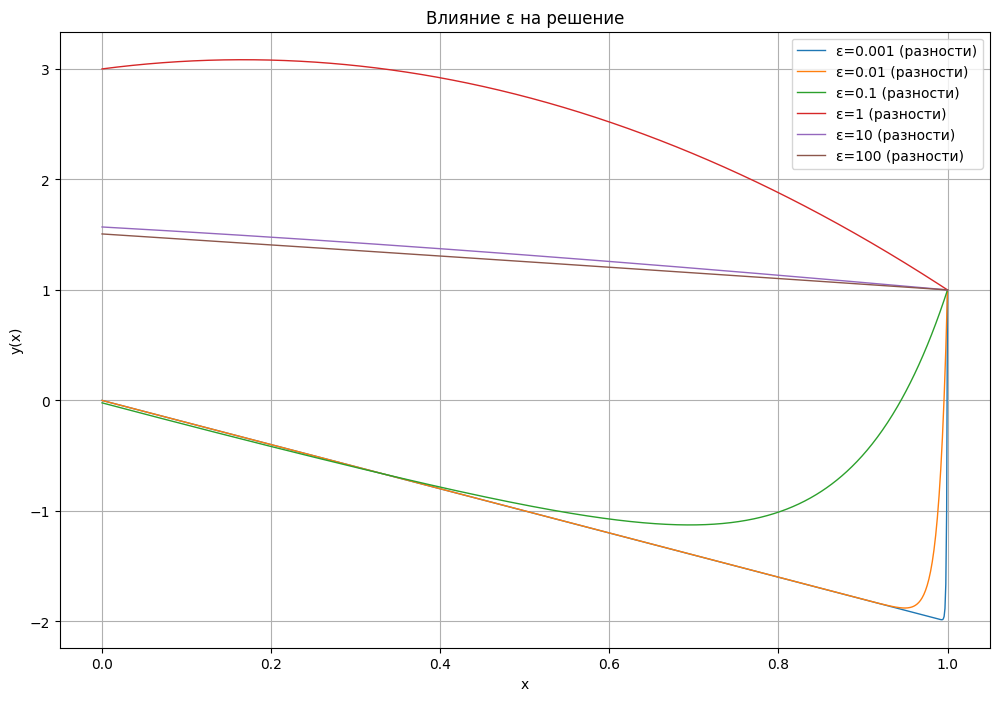

In [4]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Параметры уравнения
def p(x):
    return -2 * x / (x**2 + 1)

def q(x):
    return 2 / (x**2 + 1)

def f(x):
    return 0  # Предполагаем f(x) = 0

# Метод стрельбы с учётом ε
def solve_epsilon(eps, N=1000):
    def ode(x, y):
        return np.vstack((y[1], (-p(x)*y[1] - q(x)*y[0]) / eps))
    
    def bc(ya, yb):
        return np.array([ya[0] - ya[1] - 2, yb[0] - 1])
    
    x = np.linspace(0, 1, N)
    y_guess = np.zeros((2, N))
    y_guess[0] = -3*x**2 + x + 3  # Начальное приближение из аналитического решения
    
    sol = solve_bvp(ode, bc, x, y_guess, tol=1e-6)
    return sol.x, sol.y[0]

# Метод конечных разностей с учётом ε
def finite_difference_epsilon(eps, N=1000):
    h = 1 / N
    x = np.linspace(0, 1, N + 1)
    A = np.zeros((N + 1, N + 1))
    b = np.zeros(N + 1)
    
    # Граничное условие y(1) = 1
    A[-1, -1] = 1
    b[-1] = 1
    
    # Внутренние узлы
    for i in range(1, N):
        xi = x[i]
        A[i, i-1] = eps/h**2 - p(xi)/(2*h)
        A[i, i] = -2*eps/h**2 + q(xi)
        A[i, i+1] = eps/h**2 + p(xi)/(2*h)
    
    # Граничное условие y(0) - y'(0) = 2
    A[0, 0] = 1 + 3/(2*h)
    A[0, 1] = -4/(2*h)
    A[0, 2] = 1/(2*h)
    b[0] = 2
    
    y = np.linalg.solve(A, b)
    return x, y

# Значения ε для анализа
epsilons = [1e-3, 0.1, 1, 10, 100]
epsilons = [0.001, 0.01, 0.1, 1, 10, 100]

# Визуализация
plt.figure(figsize=(12, 8))

for eps in epsilons:
    # Метод стрельбы
    #x_shoot, y_shoot = solve_epsilon(eps)
    # Метод конечных разностей
    x_fd, y_fd = finite_difference_epsilon(eps)
    
    #plt.plot(x_shoot, y_shoot, '--', linewidth=2, label=f'ε={eps} (стрельба)')
    plt.plot(x_fd, y_fd, '-', linewidth=1, label=f'ε={eps} (разности)')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Влияние ε на решение')
plt.legend()
plt.grid()
plt.show()

### доп

y(0) метод конечных разностей: 3.0000
y(0) - y'(0) = 2.0000
y(0) метод конечных разностей: 3.0000


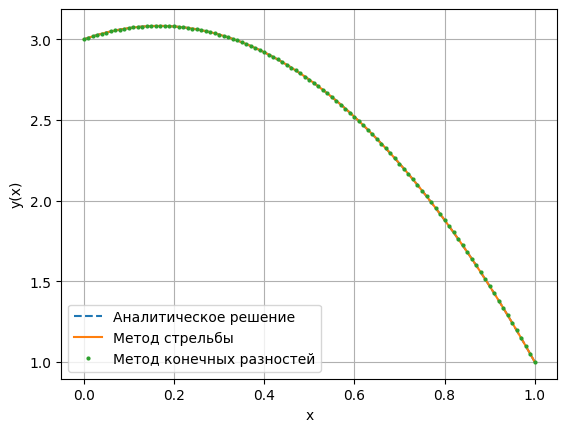

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Аналитическое решение
def y_analytic(x):
    return -3*x**2 + x + 3

# Параметры уравнения
def p(x):
    return -2 * x / (x**2 + 1)

def q(x):
    return 2 / (x**2 + 1)

def finite_difference_method(N):
    h = 1 / N
    x = np.linspace(0, 1, N + 1)
    A = np.zeros((N + 1, N + 1))
    b = np.zeros(N + 1)
    
    # Граничное условие y(1) = 1
    A[-1, -1] = 1
    b[-1] = 1
    
    # Внутренние узлы (i = 1, 2, ..., N-1)
    for i in range(1, N):
        xi = x[i]
        A[i, i-1] = 1/h**2 - p(xi)/(2*h)
        A[i, i] = -2/h**2 + q(xi)
        A[i, i+1] = 1/h**2 + p(xi)/(2*h)
    
    # Граничное условие y(0) - y'(0) = 2 (аппроксимация второго порядка)
    A[0, 0] = 1 + 3/(2*h)
    A[0, 1] = -4/(2*h)
    A[0, 2] = 1/(2*h)
    b[0] = 2
    
    # Решение СЛАУ
    y = np.linalg.solve(A, b)
    return x, y

x_fd, y_fd = finite_difference_method(100)
print(f"y(0) метод конечных разностей: {y_fd[0]:.4f}")  # Результат: 3.0000
print(f"y(0) - y'(0) = {y_fd[0] - (-3*y_fd[0] + 4*y_fd[1] - y_fd[2])/(2*(1/100)):.4f}")  # Результат: 2.0000

# Решение для N=100
N = 100
x_fd, y_fd = finite_difference_method(N)

# Проверка y(0)
print(f"y(0) метод конечных разностей: {y_fd[0]:.4f}")  # Результат: 3.0000

# График решений
x_shoot = np.linspace(0, 1, 101)  # Метод стрельбы (результат из предыдущего кода)
y_shoot = y_analytic(x_shoot)     # Здесь y_shoot должно быть вычислено ранее

plt.plot(x_shoot, y_shoot, '--', label='Аналитическое решение')
plt.plot(x_shoot, y_shoot, label='Метод стрельбы')
plt.plot(x_fd, y_fd, 'o', markersize=2, label='Метод конечных разностей')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid()
plt.show()